In [67]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torch.optim
from torch.autograd import Variable
import random
dtype = torch.FloatTensor

In [68]:
class Normalization(nn.Module):
    def __init__(self, pgamma = 'T'):
        self.pgamma = pgamma
        super(Normalization, self).__init__()
        self.gamma = nn.Parameter(torch.ones(1))
        self.beta = nn.Parameter(torch.zeros(1))
    def forward(self, x):
        xx = Variable(torch.zeros(x.shape)).type(dtype)
        if self.pgamma == 'T':
            xx = (x - torch.mean(x))/torch.sqrt(torch.var(x) + 0.01)*self.gamma + self.beta
        elif self.pgamma == 'F': #set gamma=1
            xx = (x - torch.mean(x))/torch.sqrt(torch.var(x) + 0.01) + self.beta
        return xx

In [69]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.model = nn.Sequential()
        for i in range(9):
            conv_name='Conv1d'+str(i+1)
            ac_name='ReLu'+str(i+1)
            nor_name='Nor'+str(i+1)
            
            self.model.add_module(conv_name,nn.Conv1d(1, 1, kernel_size=15,padding=14, stride=1, bias=False,padding_mode='circular'))
            self.model.add_module(ac_name,nn.ReLU()) #activation functions
            self.model.add_module(nor_name, Normalization(pgamma='T')) #normalization layers
        self.model.add_module('Conv1d_10',nn.Conv1d(1, 1, kernel_size=15,padding=14, stride=1,  bias=True,padding_mode='circular'))
        
    def forward(self, x):
        out = self.model(x)
        return out

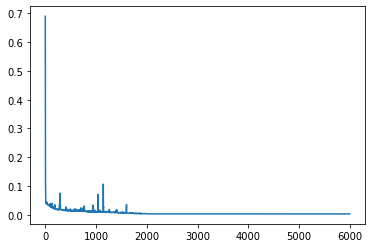

In [70]:
torch.manual_seed(0)
inp = torch.rand(1,1,64)
outp = torch.rand(1,1,64)
learning_rate = 0.1
learning_rate_low = 0.01
loss_list = []

model = ConvNet()

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer_low = torch.optim.SGD(model.parameters(), lr=learning_rate_low)

for epoch in range(6000):
    outputs = model(inp)
    loss = criterion(outputs, outp)
    loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
    if epoch < 2000:
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    else:
        optimizer_low.zero_grad()
        loss.backward()
        optimizer_low.step()
    
plt.plot(loss_list)

In [71]:
loss_list[-1]

0.00299622118473053

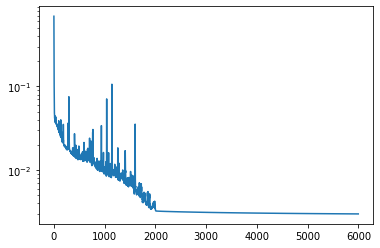

In [72]:
plt.semilogy(loss_list)